================================================================================
# ANEXO

## PROBABLES MEJORAS A FUTURO        version 9 / 24-oct

### *Trabajo en curso*

1 Crear lista categorias = df_ventas_final["categoria"].unique()  

2 Crear tabla df_producto con id_producto, producto, id_categoria, categoria

Se observó que:
1. Las ventas contienen productos con la misma denominación, sin ninguna id como para identificarlos. Pertenecen a distintas ventas individuales y tienen distinto precio.

2. Por tal razón es dificil hacer una evaluación seria del resultado de la campaña publicitaria, porque corresponde a distintos productos agrupados, con precio sin adjudicar.

3. La campaña de marketing posee el costo publicitario por producto (generico/agregado) pero no hay como relacionarlo con el costo_unitario, ni con el precio_venta

4. Sacar un precio_promedio, no estoy seguro que sirva mucho, porque la venta podria haberse hecho a un valor menor que el precio_unitario_promedio, debido a la gran dispersión de precios

Hemos visto que para el producto "Adorno de pared", los precios estan distibuidos en 3 segmentos o rangos, la idea es hacer un promedio por rango y
luego renombrar los productos segun el rango, por ej:
"Adorno de pared" => "Adorno de pared R1"

De esta manera en lugar de tener 100 productos genericos los tendriamos divididos por rango de precios y con un nuevo nombre_producto que los represente
  


In [4]:
import pandas as pd

# Import dataset ventas final
url = "https://raw.githubusercontent.com/alex-degarate/TT-2C2025-Data-Analitycs-Notebooks/main/PreEntrega/Datasets/"

df_ventas_final = pd.read_csv( url + "df_ventas_final.csv")



In [ ]:
# Import dataset clientes
#df_clientes_final = pd.read_csv( url + "clientes_final.csv")

In [5]:
# Import dataset marketing
df_marketing_final = pd.read_csv( url + "marketing_final.csv")

In [ ]:
df_marketing_final.info()


In [7]:
# Hacemos una copia para hacer pruebas
df_pp_ventas = df_ventas_final.copy()
df_pp_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     2998 non-null   int64  
 1   producto     2998 non-null   object 
 2   precio_unit  2998 non-null   float64
 3   cantidad     2998 non-null   int64  
 4   fecha_venta  2998 non-null   object 
 5   categoria    2998 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 140.7+ KB


In [ ]:
# @title
df_pp_ventas[ df_pp_ventas["producto"] == "Adorno de pared"].count()
# "producto"] == "Adorno de pared"] hay => 100
# df_pp_ventas.sort_values(by="producto", ascending=True, inplace=False)

df_pp_ventas[ df_pp_ventas["producto"] == "Adorno de pared"]

In [9]:
df_pp_ventas.head()

,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración
2,1156,Secadora,97.96,3,2024-01-02,Electrodomésticos
3,1372,Heladera,114.35,8,2024-01-02,Electrodomésticos
4,1546,Secadora,106.21,4,2024-01-02,Electrodomésticos


In [10]:
#df_pp_ventas[ df_pp_ventas["producto"] == "Adorno de pared"].count()
# "producto"] == "Adorno de pared"] hay => 100
df_pp_ventas.sort_values(by="producto", ascending=True, inplace=True)
df_pp_ventas[ df_pp_ventas["producto"] == "Adorno de pared"]

# "Cuadro decorativo"] hay 100
#df_pp_ventas[ df_pp_ventas["producto"] == "Cuadro decorativo"].count()
#df_pp_ventas[ df_pp_ventas["producto"] == "Cuadro decorativo"].mean()

,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria
1476,410,Adorno de pared,109.64,3,2024-06-21,Decoración
2426,620,Adorno de pared,92.16,4,2024-10-21,Decoración
697,780,Adorno de pared,79.13,7,2024-03-21,Decoración
255,50,Adorno de pared,83.10,5,2024-01-31,Decoración
112,260,Adorno de pared,101.48,9,2024-01-15,Decoración
...,...,...,...,...,...,...
2211,250,Adorno de pared,104.58,7,2024-09-22,Decoración
1065,100,Adorno de pared,112.16,8,2024-05-02,Decoración
1668,200,Adorno de pared,110.40,5,2024-07-16,Decoración
1720,870,Adorno de pared,85.11,4,2024-07-22,Decoración


In [ ]:
#df_pp_ventas = df_pp_ventas.sort_values(by="producto", ascending=True)
df_pp_ventas[df_pp_ventas["producto"] == "Adorno de pared"].head(100)

#sort_values(by="valor_venta", ascending=False, inplace=True)
#df_pp_ventas.head()

In [13]:
# CREAR TABLA [ producto ]
# Crear un nuevo DF con productos unicos y sus categorias de df_pp_ventas
df_producto = df_pp_ventas[["producto", "categoria"]].drop_duplicates().reset_index(drop=True)

# Create a unique id_producto for each product
df_producto["id_producto"] = df_producto.index + 1

# Create a unique id_categoria for each category
df_producto["id_categoria"] = df_producto["categoria"].astype('category').cat.codes + 1

# Reorder columns to match the requested order
df_producto = df_producto[["id_producto", "producto", "id_categoria", "categoria"]]

# Visualizar el nuevo DF
display(df_producto.head())


,id_producto,producto,id_categoria,categoria
0,1,Adorno de pared,1,Decoración
1,2,Alfombra,1,Decoración
2,3,Aspiradora,2,Electrodomésticos
3,4,Auriculares,3,Electrónica
4,5,Batidora,2,Electrodomésticos


In [ ]:
# ventas_categoria.sort_values(by="valor_venta", ascending=False, inplace=True)
# mal df_pp_ventas[df_pp_ventas["producto"]].sum()

# IMPRIMIR la lista de productos ordenados alfabeticamente y las ventas
#----------------------------------------------------
df_pp_ventas["producto"].value_counts().sort_index()
#---------------------------------------------------

In [ ]:
df_pp_ventas[["producto"] == "Adorno de pared"]["precio_unit"].mean()

In [18]:
# Filtramos el DF por el producto "Adorno de pared" y calculamos la media de 'precio_unit'
mean_precio_adorno_pared = df_pp_ventas[df_pp_ventas["producto"] == "Adorno de pared"]["precio_unit"].mean()

print(f"El precio promedio para 'Adorno de pared' es: {mean_precio_adorno_pared:.2f}")

El precio promedio para 'Adorno de pared' es: 76.10


## Generamos la tabla [ Adorno de pared ]

In [40]:
# Generamos una tabla aislada para el producto "Adorno de pared"
df_adorno_pared = df_pp_ventas[df_pp_ventas["producto"] == "Adorno de pared"].copy()

media = df_adorno_pared["precio_unit"].mean()
print(f"The mean price for 'Adorno de pared' is: {media:.2f}")
df_adorno_pared.describe()

The mean price for 'Adorno de pared' is: 76.10


,id_venta,precio_unit,cantidad
count,100.00000,100.000000,100.000000
mean,505.00000,76.097800,6.330000
std,290.11492,27.023575,3.088117
min,10.00000,27.890000,1.000000
25%,257.50000,54.297500,4.000000
50%,505.00000,78.395000,6.000000
75%,752.50000,100.745000,9.000000
max,1000.00000,119.300000,12.000000


In [41]:
df_adorno_pared.head()


,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria
1476,410,Adorno de pared,109.64,3,2024-06-21,Decoración
2426,620,Adorno de pared,92.16,4,2024-10-21,Decoración
697,780,Adorno de pared,79.13,7,2024-03-21,Decoración
255,50,Adorno de pared,83.10,5,2024-01-31,Decoración
112,260,Adorno de pared,101.48,9,2024-01-15,Decoración


## # Como vemos hay mucha dispersion del precio_unit

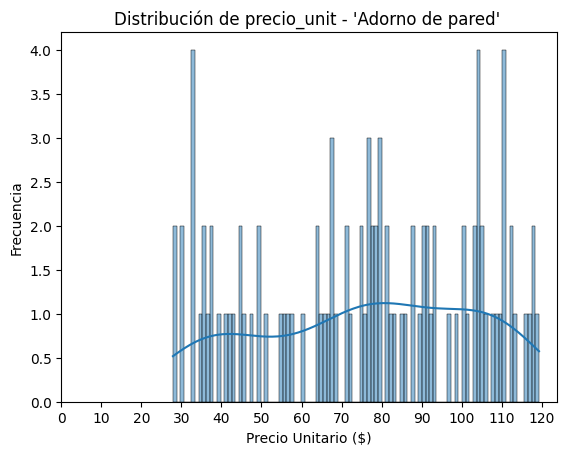

In [70]:
# @title
# Agregamos un plot para visualizar graficamente la distribución
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.histplot(df_adorno_pared["precio_unit"], bins=100, kde=True, edgecolor="black")
plt.title("Distribución de precio_unit - 'Adorno de pared' ")
plt.xlabel("Precio Unitario ($)")
plt.ylabel("Frecuencia")

# Seteamos x-axis ticks a intervalo s de 10
plt.xticks(np.arange(0, df_adorno_pared["precio_unit"].max() + 10, 10))

plt.show()

Observamos que hay 3 rangos de precios de el producto "Adorno de pared"
Lo cual hace pensar que es uns subcategoria, con productos diferentes y precio_unit diferente

In [43]:
# Calculamos percentilo 33 de 'precio_unit'
q33_precio_adorno_pared = df_adorno_pared["precio_unit"].quantile(0.33)

print(f"El percentilo 33 del precio para 'Adorno de pared' es: {q33_precio_adorno_pared:.2f}")

# Calculamos el percentilo 66 de 'precio_unit'
q66_precio_adorno_pared = df_adorno_pared["precio_unit"].quantile(0.66)
print(f"El percentilo 66 del precio para 'Adorno de pared' es: {q66_precio_adorno_pared:.2f}")

The 33th percentile of the price for 'Adorno de pared' is: 65.67
The 66th percentile of the price for 'Adorno de pared' is: 90.64


In [44]:
# Definimos los bins (puntos de corte)
bins = [25, 66, 91, 120]

# Definimos las etiquetas para los rangos
labels = ['25-66', '66-91', '91-120']

# Creamos una nueva columna 'precio_range' para estratificar 'precio_unit' dentro de los cut-off
df_adorno_pared['precio_range'] = pd.cut(df_adorno_pared['precio_unit'], bins=bins, labels=labels, right=False)

# Mostramos la cantidad de items precios en cada rango de precios
display(df_adorno_pared['precio_range'].value_counts())

# Display the first few rows with the new column
display(df_adorno_pared.head(15))

,count
precio_range,
91-120,34
25-66,33
66-91,33


,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria,precio_range
1476,410,Adorno de pared,109.64,3,2024-06-21,Decoración,91-120
2426,620,Adorno de pared,92.16,4,2024-10-21,Decoración,91-120
697,780,Adorno de pared,79.13,7,2024-03-21,Decoración,66-91
255,50,Adorno de pared,83.10,5,2024-01-31,Decoración,66-91
112,260,Adorno de pared,101.48,9,2024-01-15,Decoración,91-120
1149,460,Adorno de pared,93.62,6,2024-05-11,Decoración,91-120
2410,440,Adorno de pared,113.49,2,2024-10-17,Decoración,91-120
691,950,Adorno de pared,116.42,6,2024-03-20,Decoración,91-120
2772,640,Adorno de pared,110.44,7,2024-12-02,Decoración,91-120
1126,1000,Adorno de pared,74.64,11,2024-05-08,Decoración,66-91


In [45]:
df_adorno_pared.head()

,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria,precio_range
1476,410,Adorno de pared,109.64,3,2024-06-21,Decoración,91-120
2426,620,Adorno de pared,92.16,4,2024-10-21,Decoración,91-120
697,780,Adorno de pared,79.13,7,2024-03-21,Decoración,66-91
255,50,Adorno de pared,83.10,5,2024-01-31,Decoración,66-91
112,260,Adorno de pared,101.48,9,2024-01-15,Decoración,91-120


## Para la tabla df_adorno_pared, en el campo [producto],renombramos la descripcion del producto

In [47]:
# Observamos que hay 3 rangos de datos para Adorno de pared
# Calculamos esos rangos dividiendolos en terciles

# Recorre la tabla sacada de ventas_final, para el producto "Adorno de pared"
nLenght = df_adorno_pared.shape[0]
rango1 = [0, 0]
rango2 = [0, 0]
rango3 = [0, 0]

#        df_adorno_pared.iat[ num_fila, num_col ]  con indice= 0
# print( df_adorno_pared.iat[0, 2])

for i in range(nLenght):
    pu = df_adorno_pared.iat[i, 2]
    nomP = df_adorno_pared.iat[i, 1]
    if pu >= 25 and pu <=66:
        rango1[0] += pu
        rango1[1] += 1
        df_adorno_pared.iat[i, 1] = nomP + "-R1"

    elif pu > 66 and pu <=91:
        rango2[0] += pu
        rango2[1] += 1
        df_adorno_pared.iat[i, 1] = nomP + "-R2"

    elif pu > 91 and pu <=120:
        rango3[0] += pu
        rango3[1] += 1
        df_adorno_pared.iat[i, 1] = nomP + "-R3"

In [54]:
# Calculamos las medias x rango
media_rango1 = round( rango1[0]/rango1[1], 2)
media_rango2 = round( rango2[0]/rango2[1], 2)
media_rango3 = round( rango3[0]/rango3[1], 2)

#Visualizamos las medias
print(f"media_rango1 : {media_rango1}")
print(f"media_rango2 : {media_rango2}")
print(f"media_rango3 : {media_rango3}")

# En las celdas de mas abajo lo graficamos

media_rango1 : 44.39
media_rango2 : 78.29
media_rango3 : 105.74


In [ ]:
display(df_adorno_pared.head(15))

In [ ]:
df_producto.head()

In [55]:
# Agregamos el campo ["media_rango"] a tabla df_adorno_pared
df_adorno_pared["media_rango"] = df_adorno_pared.apply(lambda row: media_rango1 if row["precio_range"] == "25-66" else
                                                        media_rango2 if row["precio_range"] == "66-91" else
                                                        media_rango3, axis=1)

In [ ]:
df_adorno_pared.head(15)

## Cuadro decorativo

In [ ]:
# "Cuadro decorativo"] hay 100
#df_pp_ventas[ df_pp_ventas["producto"] == "Cuadro decorativo"].count()
#df_pp_ventas[ df_pp_ventas["producto"] == "Cuadro decorativo"].mean()

In [61]:
#df_pp_ventas = df_pp_ventas.sort_values(by="producto", ascending=True)
df_pp_ventas[df_pp_ventas["producto"] == "Cuadro decorativo"].head(100)


,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria
2907,112,Cuadro decorativo,96.66,9,2024-12-19,Decoración
1323,482,Cuadro decorativo,54.21,7,2024-05-31,Decoración
2918,222,Cuadro decorativo,84.64,1,2024-12-21,Decoración
1320,432,Cuadro decorativo,77.42,12,2024-05-30,Decoración
1981,412,Cuadro decorativo,67.79,9,2024-08-24,Decoración
...,...,...,...,...,...,...
232,912,Cuadro decorativo,111.56,9,2024-01-28,Decoración
480,332,Cuadro decorativo,124.20,10,2024-02-26,Decoración
486,2,Cuadro decorativo,106.12,3,2024-02-27,Decoración
344,212,Cuadro decorativo,52.83,12,2024-02-10,Decoración


## Generamos la tabla [ df_cuadro_decorativo ]

In [65]:

# Generamos una tabla aislada para el producto "Cuadro decorativo"
df_cuadro_decorativo = df_pp_ventas[df_pp_ventas["producto"] == "Cuadro decorativo"].copy()

media = df_cuadro_decorativo["precio_unit"].mean()
print(f"The mean price for 'Cuadro decorativo' is: {media:.2f}")
df_cuadro_decorativo.describe()

The mean price for 'Cuadro decorativo' is: 74.58


,id_venta,precio_unit,cantidad
count,100.00000,100.000000,100.000000
mean,497.00000,74.578000,7.260000
std,290.11492,29.275527,3.395243
min,2.00000,26.200000,1.000000
25%,249.50000,51.262500,5.000000
50%,497.00000,75.125000,8.000000
75%,744.50000,101.342500,10.000000
max,992.00000,124.830000,12.000000


In [ ]:
## Como vemos

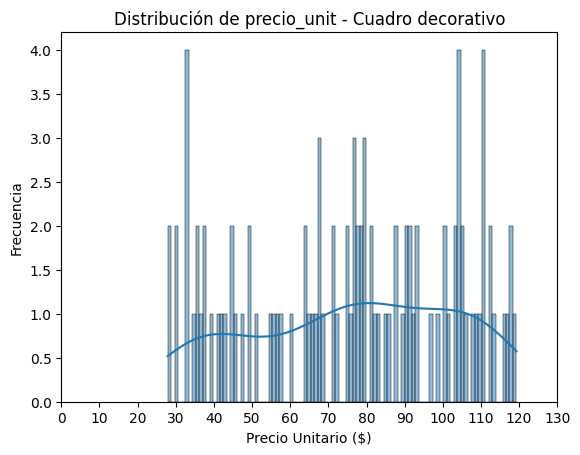

In [69]:
# @title
# Agregamos un plot para visualizar graficamente la distribución
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.histplot(df_adorno_pared["precio_unit"], bins=100, kde=True, edgecolor="black")
plt.title("Distribución de precio_unit - Cuadro decorativo")
plt.xlabel("Precio Unitario ($)")
plt.ylabel("Frecuencia")

# Seteamos x-axis ticks a intervalo s de 10
plt.xticks(np.arange(0, df_cuadro_decorativo ["precio_unit"].max() + 10, 10))

plt.show()

In [71]:
# Calculamos percentilo 33 de 'precio_unit'
q33_precio_cuadro_decorativo = df_cuadro_decorativo["precio_unit"].quantile(0.33)

print(f"El percentilo 33 del precio para 'Cuadro decorativo' es: {q33_precio_cuadro_decorativo:.2f}")

# Calculamos el percentilo 66 de 'precio_unit'
q66_precio_cuadro_decorativo = df_cuadro_decorativo["precio_unit"].quantile(0.66)
print(f"El percentilo 66 del precio para 'Cuadro decorativo' es: {q66_precio_cuadro_decorativo:.2f}")

El percentilo 33 del precio para 'Cuadro decorativo' es: 60.92
El percentilo 66 del precio para 'Cuadro decorativo' es: 86.29


In [73]:
# Definimos los bins (puntos de corte)
bins = [25, 55, 95, 130]

# Definimos las etiquetas para los rangos
labels = ['25-55', '61-95', '95-130']

# Creamos una nueva columna 'precio_range' para estratificar 'precio_unit' dentro de los cut-off
df_cuadro_decorativo['precio_range'] = pd.cut(df_cuadro_decorativo['precio_unit'], bins=bins, labels=labels, right=False)

# Mostramos la cantidad de items precios en cada rango de precios
display(df_cuadro_decorativo['precio_range'].value_counts())

# Display the first few rows with the new column
display(df_cuadro_decorativo.head(15))

,count
precio_range,
61-95,38
25-61,33
95-130,29


,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria,precio_range
2907,112,Cuadro decorativo,96.66,9,2024-12-19,Decoración,95-130
1323,482,Cuadro decorativo,54.21,7,2024-05-31,Decoración,25-61
2918,222,Cuadro decorativo,84.64,1,2024-12-21,Decoración,61-95
1320,432,Cuadro decorativo,77.42,12,2024-05-30,Decoración,61-95
1981,412,Cuadro decorativo,67.79,9,2024-08-24,Decoración,61-95
1318,82,Cuadro decorativo,47.42,5,2024-05-30,Decoración,25-61
1036,202,Cuadro decorativo,106.72,4,2024-04-29,Decoración,95-130
2522,582,Cuadro decorativo,61.67,10,2024-11-01,Decoración,61-95
2256,562,Cuadro decorativo,29.72,3,2024-09-28,Decoración,25-61
1536,502,Cuadro decorativo,120.85,10,2024-06-29,Decoración,95-130


In [58]:
# @title
'''
# Calculate the sum and count for each range using boolean indexing

rango1_data = df_adorno_pared[df_adorno_pared['precio_range'] == '25-66']
rango1_sum = rango1_data['precio_unit'].sum()
rango1_count = rango1_data.shape[0]

rango2_data = df_adorno_pared[df_adorno_pared['precio_range'] == '63-93']
rango2_sum = rango2_data['precio_unit'].sum()
rango2_count = rango2_data.shape[0]

rango3_data = df_adorno_pared[df_adorno_pared['precio_range'] == '93-120']
rango3_sum = rango3_data['precio_unit'].sum()
rango3_count = rango3_data.shape[0]


print(f"Range 25-66: Sum = {rango1_sum:.2f}, Count = {rango1_count}, Average = {(rango1_sum / rango1_count):.2f}")
print(f"Range 63-93: Sum = {rango2_sum:.2f}, Count = {rango2_count}, Average = {(rango2_sum / rango2_count):.2f}")
print(f"Range 93-120: Sum = {rango3_sum:.2f}, Count = {rango3_count}, Average = {(rango3_sum / rango3_count):.2f}")
'''


'\n# Calculate the sum and count for each range using boolean indexing\n\nrango1_data = df_adorno_pared[df_adorno_pared[\'precio_range\'] == \'25-66\']\nrango1_sum = rango1_data[\'precio_unit\'].sum()\nrango1_count = rango1_data.shape[0]\n\nrango2_data = df_adorno_pared[df_adorno_pared[\'precio_range\'] == \'63-93\']\nrango2_sum = rango2_data[\'precio_unit\'].sum()\nrango2_count = rango2_data.shape[0]\n\nrango3_data = df_adorno_pared[df_adorno_pared[\'precio_range\'] == \'93-120\']\nrango3_sum = rango3_data[\'precio_unit\'].sum()\nrango3_count = rango3_data.shape[0]\n\n\nprint(f"Range 25-66: Sum = {rango1_sum:.2f}, Count = {rango1_count}, Average = {(rango1_sum / rango1_count):.2f}")\nprint(f"Range 63-93: Sum = {rango2_sum:.2f}, Count = {rango2_count}, Average = {(rango2_sum / rango2_count):.2f}")\nprint(f"Range 93-120: Sum = {rango3_sum:.2f}, Count = {rango3_count}, Average = {(rango3_sum / rango3_count):.2f}")\n'

In [32]:
# @title
'''
import seaborn as sns
import matplotlib.pyplot as plt

# Create a KDE plot
sns.kdeplot(df_adorno_pared["precio_unit"], fill=True)
plt.title("Kernel Density Estimate of Precio Unitario for Adorno de pared")
plt.xlabel("Precio Unitario ($)")
plt.ylabel("Density")
plt.show()
'''

'\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Create a KDE plot\nsns.kdeplot(df_adorno_pared["precio_unit"], fill=True)\nplt.title("Kernel Density Estimate of Precio Unitario for Adorno de pared")\nplt.xlabel("Precio Unitario ($)")\nplt.ylabel("Density")\nplt.show()\n'

In [33]:
df_marketing.info()
df_marketing.head()

NameError: name 'df_marketing' is not defined

In [ ]:
df_marketing2 = df_marketing.sort_values(by="producto", ascending=True)
df_marketing2.info()
# df_canales = df_marketing.copy()
# df_canales.head()
df_marketing2.head(3)

In [ ]:
df_marketing2.to_csv('df_marketing2.csv', index=False)

In [ ]:
df_ventas_final.head()

In [ ]:
# Creamos DF con nombres productos unicos y sus categorias de df_ventas_final
df_producto = df_ventas_final[["producto", "categoria"]].drop_duplicates().reset_index(drop=True)

# Renombramos las columnas
df_producto.rename(columns={"producto": "prod_name", "categoria": "cat_name"}, inplace=True)

# ordenamos DF alfabeticamente por 'prod_name' en forma ascendente
df_producto = df_producto.sort_values(by="prod_name", ascending=True).reset_index(drop=True)

# Agregamos una column con los valores indices, ya ordenado producto
df_producto["prod_id"] = df_producto.index

# Crear una categoria'cat_id' numerica por cada categoria
df_producto["cat_id"] = df_producto["cat_name"].astype('category').cat.codes + 1

# Reordenamos columnas
df_producto = df_producto[["prod_id", "prod_name", "cat_id", "cat_name"]]

# Display the new DataFrame
display(df_producto.info())

In [ ]:
# Display the new DataFrame
display(df_producto.head(3))

In [ ]:
#df_ventas_final.to_csv('df_ventas_final.csv', index=False)
df_producto.to_csv('df_producto.csv', index=False)

In [ ]:
df_ventas_final.head()


In [ ]:
# @title
'''
# Merge df_ventas_final with df_producto to add the 'prod_id' column
df_ventas_final2 = pd.merge(df_ventas_final, df_producto[['prod_id', 'prod_name']], left_on='producto', right_on='prod_name', how='left')

# Drop the redundant 'prod_name' column from the merge
df_ventas_final2.drop('prod_name', axis=1, inplace=True)

# Display the updated DataFrame
display(df_ventas_final2.head())
'''

In [ ]:
# Agregar a df_ventas_final la columnas "prod_id" y cat_id
df_ventas_final = pd.merge(df_ventas_final, df_producto[['prod_id', 'prod_name', 'cat_id', 'cat_name']], left_on='producto', right_on='prod_name', how='left')

# Drop the redundant 'prod_name' and 'cat_name' columns from the merge
df_ventas_final.drop(['prod_name', 'cat_name'], axis=1, inplace=True)

# Display the updated DataFrame
display(df_ventas_final.head())

In [ ]:
df_ventas_final = df_ventas_final[[ "id_venta",	"prod_id", "producto","precio_unit", "cantidad",
                                   "fecha_venta", "cat_id","categoria", "valor_venta"]]
df_ventas_final.head()

In [ ]:
df_ventas_final.to_csv('df_ventas_final4.csv', index=False)